Accuracy: 0.53
                  precision    recall  f1-score   support

down_by_elevator       0.29      0.48      0.36      3981
      going_down       0.31      0.25      0.28      6782
        going_up       0.42      0.19      0.26      7192
         running       0.68      0.43      0.52      5462
         sitting       0.92      0.95      0.94      3702
    sitting_down       0.59      0.66      0.62      1109
        standing       0.71      0.39      0.50     13731
     standing_up       0.25      0.60      0.35      1149
  up_by_elevator       0.37      0.50      0.42      6729
         walking       0.61      0.79      0.69     22432

        accuracy                           0.53     72269
       macro avg       0.51      0.52      0.50     72269
    weighted avg       0.56      0.53      0.52     72269



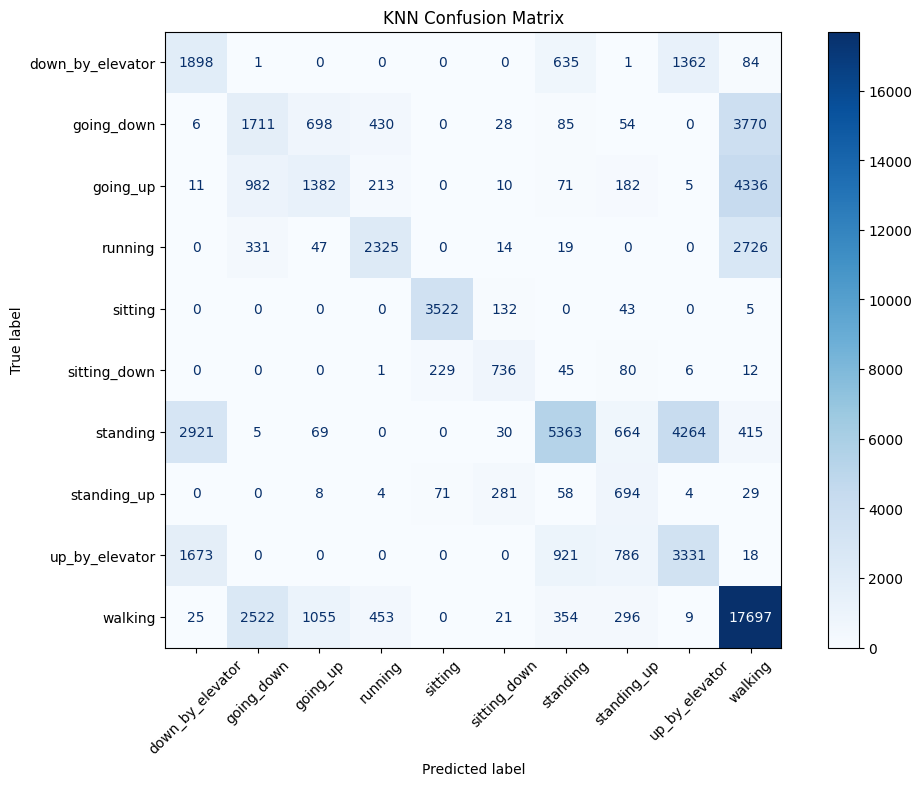

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./csv/database_complementary_filter.csv')

# seperando os atributos do alvo
X = df.drop(columns=['activity'])
y = df['activity']

# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Naive Bayes model to the training data
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.xticks(rotation=45)
plt.title('KNN Confusion Matrix')
plt.show()